<a href="https://colab.research.google.com/github/Farhatul3178/ML-Exercise/blob/main/Session_12_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/weather_2020-11.csv')

In [ ]:
data.head(25)

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3
5,2020-11-01T00:00:00Z,WS_PT1H_MAX,3.5
6,2020-11-01T00:00:00Z,WS_PT1H_MIN,3.0
7,2020-11-01T00:00:00Z,WD_PT1H_AVG,177.0
8,2020-11-01T00:00:00Z,PRA_PT1H_ACC,NaN
9,2020-11-01T00:00:00Z,PRI_PT1H_MAX,NaN


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time            8364 non-null   object
 1   ParameterName   8364 non-null   object
 2   ParameterValue  6229 non-null   object
dtypes: object(3)
memory usage: 196.2+ KB


In [ ]:
data.describe()

,Time,ParameterName,ParameterValue
count,8364,8364,6229
unique,697,12,807
top,2020-11-01T00:00:00Z,TA_PT1H_AVG,3.0
freq,12,697,90


In [ ]:
# Remove NaN values
data = data.dropna()

In [ ]:
data.head(25)

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3
5,2020-11-01T00:00:00Z,WS_PT1H_MAX,3.5
6,2020-11-01T00:00:00Z,WS_PT1H_MIN,3.0
7,2020-11-01T00:00:00Z,WD_PT1H_AVG,177.0
10,2020-11-01T00:00:00Z,PA_PT1H_AVG,1023.5
12,2020-11-01T01:00:00Z,TA_PT1H_AVG,6.4


In [ ]:
parameter_data = data[['Time', 'ParameterName', 'ParameterValue']]

In [ ]:
# Convert ParameterValue to numeric, handling errors as NaN
parameter_data['ParameterValue'] = pd.to_numeric(parameter_data['ParameterValue'], errors='coerce')


In [ ]:
# Drop rows with NaN values in ParameterValue
parameter_data = parameter_data.dropna(subset=['ParameterValue'])


In [ ]:
# Dictionary to map parameter abbreviations to full names
parameter_mapping = {
    'TA_PT1H_AVG': 'Temperature Average',
    'RH_PT1H_AVG': 'Relative Humidity',
    'WS_PT1H_AVG': 'Wind Speed',
    'PRA_PT1H_AVG': 'Precipitation Amount',
    'PA_PT1H_AVG': 'Pressure Average'
}


In [ ]:
# Initialize empty DataFrames for each parameter
parameters = {param: pd.DataFrame(columns=['Time', 'Value']) for param in parameter_mapping.values()}

# Iterate over unique parameter names
for param_name, group in parameter_data.groupby('ParameterName'):
    # Check if parameter is in the mapping dictionary
    if param_name in parameter_mapping:
        # Map parameter abbreviation to full name
        param_full_name = parameter_mapping[param_name]
        # Append parameter values to corresponding DataFrame
        parameters[param_full_name] = pd.concat([parameters[param_full_name], group[['Time', 'ParameterValue']].rename(columns={'ParameterValue': 'Value'})])


In [ ]:
# Calculate statistics for each parameter
statistics = {}
for param_name, param_df in parameters.items():
    statistics[param_name] = {
        'average': param_df['Value'].mean(),
        'minimum': param_df['Value'].min(),
        'maximum': param_df['Value'].max(),
        'median': param_df['Value'].median(),
        'hour_max': param_df.loc[param_df['Value'].idxmax(), 'Time'] if not param_df.empty else None  # Hour with maximum value
    }


In [ ]:
# Print statistics
for param_name, stats in statistics.items():
    print(f"Parameter: {param_name}")
    print(f"  Average: {stats['average']}")
    print(f"  Minimum: {stats['minimum']}")
    print(f"  Maximum: {stats['maximum']}")
    print(f"  Median: {stats['median']}")
    print(f"  Hour with maximum value: {stats['hour_max']}")
    print()

Parameter: Temperature Average
  Average: 2.7400286944045913
  Minimum: -8.4
  Maximum: 10.9
  Median: 2.8
  Hour with maximum value: 2020-11-03T06:00:00Z

Parameter: Relative Humidity
  Average: 87.90138674884437
  Minimum: 61.0
  Maximum: 100.0
  Median: 89.0
  Hour with maximum value: 2020-11-12T13:00:00Z

Parameter: Wind Speed
  Average: 3.9007173601147778
  Minimum: 0.4
  Maximum: 10.3
  Median: 3.7
  Hour with maximum value: 2020-11-02T12:00:00Z

Parameter: Precipitation Amount
  Average: nan
  Minimum: nan
  Maximum: nan
  Median: nan
  Hour with maximum value: None

Parameter: Pressure Average
  Average: 1012.6341463414634
  Minimum: 977.3
  Maximum: 1032.6
  Median: 1013.7
  Hour with maximum value: 2020-11-10T18:00:00Z



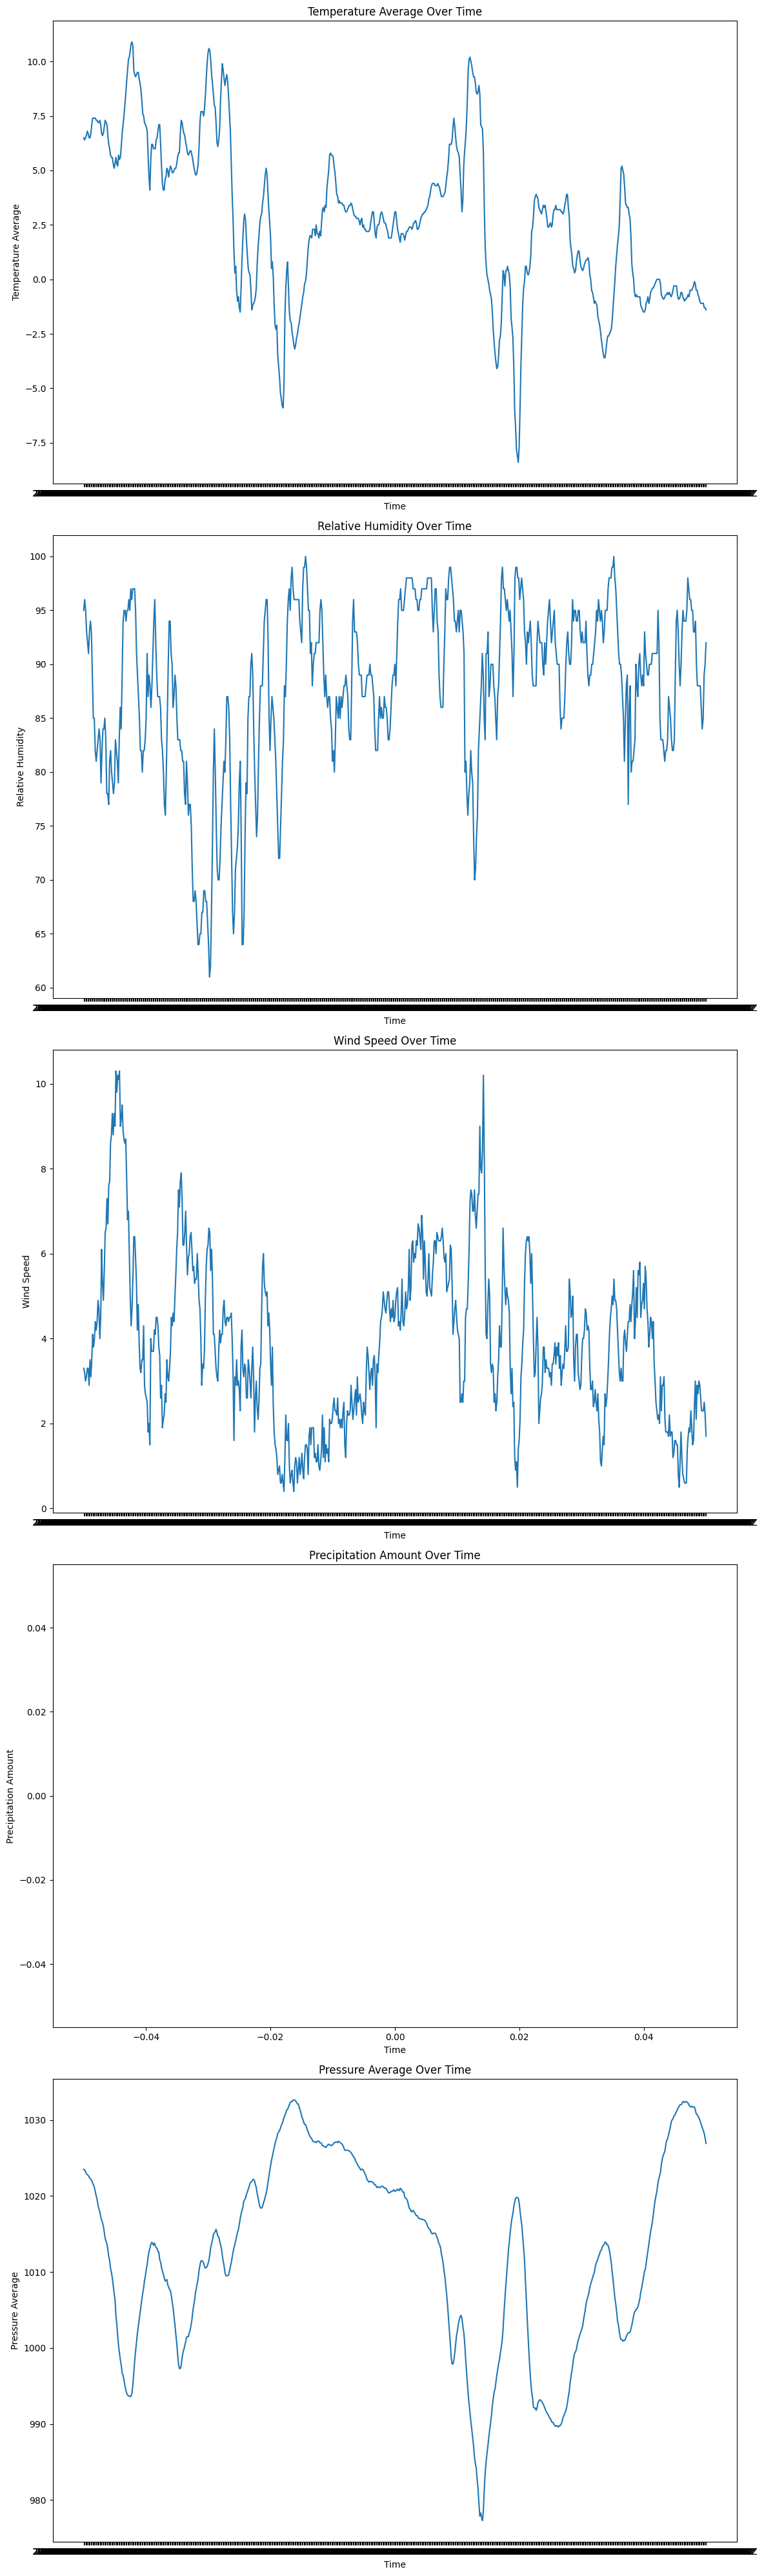

In [ ]:
# Plotting
num_params = len(parameters)
fig, axes = plt.subplots(num_params, 1, figsize=(12, 8*num_params))

for i, (param_name, param_df) in enumerate(parameters.items()):
    axes[i].plot(param_df['Time'], param_df['Value'])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(param_name)
    axes[i].set_title(f'{param_name} Over Time')

plt.tight_layout()
plt.show()